Collect the datas and split them

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import kerasNN
import datacontrol
import validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import time
#  collect the data
TrainingData = datacontrol.readFile("../data/Development.csv")
TestData = datacontrol.readFile("../data/MyTest.csv")
X, Y = datacontrol.divide(TrainingData)
XT , YT = datacontrol.divide(TestData)
scaler = StandardScaler()

<h1>SVM test <h1/>
    

In [2]:
# create svr regressor object
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor
start = time.time()
svr = svm.SVR(kernel="rbf", gamma=0.1, C= 19, epsilon=0.01)
SVRegressor = MultiOutputRegressor(svr, n_jobs=8)
scaler.fit(X)
X = scaler.transform(X)
XT = scaler.transform(XT)
SVRegressor.fit(X, Y)
ypredicted = SVRegressor.predict(XT)
SVMTestResult = validation.MeanEuclidianError(ypredicted, YT)
print("Test Error with svm: %.2f" %SVMTestResult)
print("Time: %.2f"%(time.time()-start))

Test Error with svm: 0.99
Time: 1.27


<h1>ELM test <h1/>

In [8]:
import ExtremeLearningMAchine as elm
start = time.time()
ellm = elm.elm(NetworArchitecture = [2000], activation = "relu" ,alpha = 0.8)
ellm.fit(X, Y, scaler = True)
ypredicted = ellm.predict(XT)
ELMresults = validation.MeanEuclidianError(ypredicted, YT)
print("Test Error with svm: %.2f" %ELMresults)
print("Time: %.2f"%(time.time()-start))

Test Error with svm: 1.07
Time: 2.10


<h1>MLP test<h1/>

Min loss on validation set was on epoch 2797
loss: 0.86
time: 926.539743


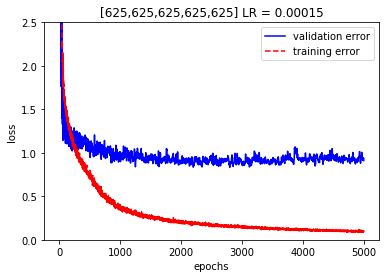

Test Error with NN: 0.86
Time: 926.69


In [12]:
import kerasNN
start = time.time()
NN = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 5000, DropOutHiddenLayer = 0.2)
MLPResult = NN.trainValidation(X, Y,XT, YT, plot=True)
print("Test Error with NN: %.2f" %MLPResult)
print("Time: %.2f"%(time.time()-start))

In [11]:
print("Test Error with NN: %.2f" %MLPResult)
print("Time: %.2f"%(time.time()-start))

Test Error with NN: 0.89
Time: 4551.07
